In [20]:
#Import needed libraries

import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
from datetime import datetime

In [21]:
#Create Main databases for epoch 12 and 90

batches = ['a', 'c', 'e']#, 'k', 'n']
df_90 = pd.DataFrame()
df_12 = pd.DataFrame()

dataset = 'CIFAR10' #'ImageNet16-120'

for letter in batches:
    filename = '../../outputs/'+dataset+'/'+letter+'_22-05-21_e90_'+dataset+'.csv'
    df_partial = pd.read_csv(filename)
    df_partial = df_partial[~df_partial.isin([np.nan, np.inf, -np.inf]).any(1)] ##Gets rid of infs, NaNs, this might be unnecessary
    df_90 = pd.concat([df_90, df_partial], ignore_index=True)

batches = ['a', 'c', 'e']#, 'k', 'n']
for letter in batches:
    filename = '../../outputs/'+dataset+'/'+letter+'_22-05-21_e12_'+dataset+'.csv'
    df_partial = pd.read_csv(filename)
    df_partial = df_partial[~df_partial.isin([np.nan, np.inf, -np.inf]).any(1)] ##Gets rid of infs, NaNs, this might be unnecessary
    df_12 = pd.concat([df_12, df_partial], ignore_index=True)

#print(df_90)
#print(df_12)

In [22]:
#Get name of folder
now = datetime.now()
date_time = now.strftime("%m-%d-%Y_%H-%M-%S")
save_location = "figures/" + date_time + dataset + '/'
try:
    os.mkdir(save_location)
except OSError:
    print ("Creation of the directory %s failed" % save_location)
else:
    print ("Successfully created the directory %s " % save_location)
print("Saving to: ", save_location)

try:
    os.mkdir(save_location + '90/')
except OSError:
    print ("Creation of the directory %s failed" % save_location)
else:
    print ("Successfully created the directory %s " % save_location)
print("Saving to: ", save_location)

try:
    os.mkdir(save_location + '12/')
except OSError:
    print ("Creation of the directory %s failed" % save_location)
else:
    print ("Successfully created the directory %s " % save_location)
print("Saving to: ", save_location)

Successfully created the directory figures/05-26-2021_10-25-35ImageNet16-120/ 
Saving to:  figures/05-26-2021_10-25-35ImageNet16-120/
Successfully created the directory figures/05-26-2021_10-25-35ImageNet16-120/ 
Saving to:  figures/05-26-2021_10-25-35ImageNet16-120/
Successfully created the directory figures/05-26-2021_10-25-35ImageNet16-120/ 
Saving to:  figures/05-26-2021_10-25-35ImageNet16-120/


In [23]:
# 2 W's x 2 Q's x 3 L's x (test and gen) x 2 epochs
# Try stacking graphs later.

Y = ['test_acc','g_gap']
X = ['mqBE_L1' ,'mqBE_L2', 'mqBE_L3', 'mqBE_L4', 'mqBE_L5',
     'mqAE_L1', 'mqAE_L2', 'mqAE_L3', 'mqAE_L4', 'mqAE_L5',
     'erBE_L1', 'erBE_L2', 'erBE_L3', 'erBE_L4', 'erBE_L5',
     'erAE_L1', 'erAE_L2', 'erAE_L3', 'erAE_L4', 'erAE_L5',
      'rAE_L1',  'rAE_L2',  'rAE_L3',  'rAE_L4',  'rAE_L5']

for y in Y:
    #Get Y label
    if 'test' in y:
        accuracy = "Test Accuracy (%)"
    else:
        accuracy = "Generalization Gap (%)"

for y in Y:
    #Get Y label
    if 'test' in y:
        accuracy = "Test Accuracy (%)"
    else:
        accuracy = "Generalization Gap (%)"

    for x in X:
        #Get X label:
        name = ''
        title = [0,0,0]
        if 'BE' in x:
            name    += 'Q'
            title[1] = 'Without LRF'
        else:
            name    += '\widehat{Q}'
            title[1] = 'With LRF'
        if 'mq' in x:
            name     += '_{G}'
            title[0]  = 'Knowledge Quality'
        elif 'er' in x:
            name     += '_{R}'
            title[0]  = 'Effective Rank'
        else:
            name     += '_{ER}'
            title[0]  = 'Rank'
        if '1' in x:
            name    += '^{L1}'
            title[2] = 'Aggregated using L1' 
        elif '2' in x:
            name += '^{L2}'
            title[2] = 'Aggregated using L2'
        elif '3' in x:
            name += '^{L3}'
            title[2] = 'Aggregated using L3'
        elif '4' in x:
            name += '^{L4}'
            title[2] = 'Aggregated using L4'
        else:
            name += '^{L5}'
            title[2] = 'Aggregated using L5'
        
        #name = "${" + name + "}$"
        
        #Add pearson to title
        title = title[0] + ' ' + title[1] + ' ' + title[2] + ', Pearson: ' + str(abs(stats.pearsonr(df_90[x], df_90[y])[0]))[0:5]

        #3rd degree polynomial fit
        xp = np.linspace(min(df_90[x]), max(df_90[x]), 100)
        p3 = np.poly1d(np.polyfit(df_90[x], df_90[y], 3))

        matplotlib.rc('xtick', labelsize=10);
        plt.plot(df_90[x], df_90[y], '.', xp, p3(xp),'--');
        plt.xlabel('$' + name + '$');
        plt.ylabel(accuracy);
        plt.title(title)
        title = title.replace(' ', '_')
        title = title.replace(',', '_')
        title = title.replace(':', '_')
        print("Saving: ", save_location + '90/' + title +'.pdf')
        plt.savefig(save_location + '90/' + title + '.pdf')
        plt.close()

Saving:  figures/05-26-2021_10-25-35ImageNet16-120/90/Knowledge_Quality_Without_LRF_Aggregated_using_L1__Pearson__0.515.pdf
Saving:  figures/05-26-2021_10-25-35ImageNet16-120/90/Knowledge_Quality_Without_LRF_Aggregated_using_L2__Pearson__0.486.pdf
Saving:  figures/05-26-2021_10-25-35ImageNet16-120/90/Knowledge_Quality_Without_LRF_Aggregated_using_L3__Pearson__0.501.pdf
Saving:  figures/05-26-2021_10-25-35ImageNet16-120/90/Knowledge_Quality_Without_LRF_Aggregated_using_L4__Pearson__0.255.pdf
Saving:  figures/05-26-2021_10-25-35ImageNet16-120/90/Knowledge_Quality_Without_LRF_Aggregated_using_L5__Pearson__0.201.pdf
Saving:  figures/05-26-2021_10-25-35ImageNet16-120/90/Knowledge_Quality_With_LRF_Aggregated_using_L1__Pearson__0.858.pdf
Saving:  figures/05-26-2021_10-25-35ImageNet16-120/90/Knowledge_Quality_With_LRF_Aggregated_using_L2__Pearson__0.829.pdf
Saving:  figures/05-26-2021_10-25-35ImageNet16-120/90/Knowledge_Quality_With_LRF_Aggregated_using_L3__Pearson__0.857.pdf
Saving:  figures/

In [24]:
# 2 W's x 2 Q's x 3 L's x (test and gen) x 2 epochs
# Try stacking graphs later.

Y = ['test_acc','g_gap']
X = ['mqBE_L1' ,'mqBE_L2', 'mqBE_L3', 'mqBE_L4', 'mqBE_L5',
     'mqAE_L1', 'mqAE_L2', 'mqAE_L3', 'mqAE_L4', 'mqAE_L5',
     'erBE_L1', 'erBE_L2', 'erBE_L3', 'erBE_L4', 'erBE_L5',
     'erAE_L1', 'erAE_L2', 'erAE_L3', 'erAE_L4', 'erAE_L5',
      'rAE_L1',  'rAE_L2',  'rAE_L3',  'rAE_L4',  'rAE_L5']

for y in Y:
    #Get Y label
    if 'test' in y:
        accuracy = "Test Accuracy (%)"
    else:
        accuracy = "Generalization Gap (%)"

    for x in X:
        #Get X label:
        name = ''
        title = [0,0,0]
        if 'BE' in x:
            name    += 'Q'
            title[1] = 'Without LRF'
        else:
            name    += '\widehat{Q}'
            title[1] = 'With LRF'
        if 'mq' in x:
            name     += '_{G}'
            title[0]  = 'Knowledge Quality'
        elif 'er' in x:
            name     += '_{R}'
            title[0]  = 'Effective Rank'
        else:
            name     += '_{ER}'
            title[0]  = 'Rank'
        if '1' in x:
            name    += '^{L1}'
            title[2] = 'Aggregated using L1' 
        elif '2' in x:
            name += '^{L2}'
            title[2] = 'Aggregated using L2'
        elif '3' in x:
            name += '^{L3}'
            title[2] = 'Aggregated using L3'
        elif '4' in x:
            name += '^{L4}'
            title[2] = 'Aggregated using L4'
        else:
            name += '^{L5}'
            title[2] = 'Aggregated using L5'
        
        #name = "${" + name + "}$"

        #Add pearson to title
        title = title[0] + ' ' + title[1] + ' ' + title[2] + ', Pearson: ' + str(abs(stats.pearsonr(df_12[x], df_12[y])[0]))[0:5]

        #3rd degree polynomial fit
        xp = np.linspace(min(df_12[x]), max(df_12[x]), 100)
        p3 = np.poly1d(np.polyfit(df_12[x], df_12[y], 3))

        matplotlib.rc('xtick', labelsize=10);
        plt.plot(df_12[x], df_12[y], '.', xp, p3(xp),'--');
        plt.xlabel('$' + name + '$');
        plt.ylabel(accuracy);
        plt.title(title)
        title = title.replace(' ', '_')
        title = title.replace(',', '_')
        title = title.replace(':', '_')
        print("Saving: ", save_location + '12/'+ title +'.pdf')
        plt.savefig(save_location + '12/' + title + '.pdf')
        plt.close()

Saving:  figures/05-26-2021_10-25-35ImageNet16-120/12/Knowledge_Quality_Without_LRF_Aggregated_using_L1__Pearson__0.692.pdf
Saving:  figures/05-26-2021_10-25-35ImageNet16-120/12/Knowledge_Quality_Without_LRF_Aggregated_using_L2__Pearson__0.702.pdf
Saving:  figures/05-26-2021_10-25-35ImageNet16-120/12/Knowledge_Quality_Without_LRF_Aggregated_using_L3__Pearson__0.638.pdf
Saving:  figures/05-26-2021_10-25-35ImageNet16-120/12/Knowledge_Quality_Without_LRF_Aggregated_using_L4__Pearson__0.401.pdf
Saving:  figures/05-26-2021_10-25-35ImageNet16-120/12/Knowledge_Quality_Without_LRF_Aggregated_using_L5__Pearson__0.305.pdf
Saving:  figures/05-26-2021_10-25-35ImageNet16-120/12/Knowledge_Quality_With_LRF_Aggregated_using_L1__Pearson__0.810.pdf
Saving:  figures/05-26-2021_10-25-35ImageNet16-120/12/Knowledge_Quality_With_LRF_Aggregated_using_L2__Pearson__0.805.pdf
Saving:  figures/05-26-2021_10-25-35ImageNet16-120/12/Knowledge_Quality_With_LRF_Aggregated_using_L3__Pearson__0.805.pdf
Saving:  figures/

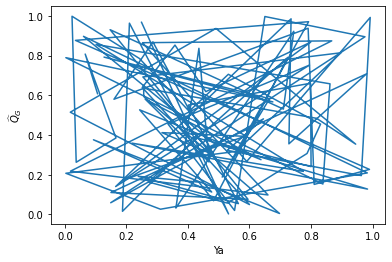

In [5]:
## Caption Test
x = np.random.rand(100)
y = np.random.rand(100)

plt.plot(x, y)
plt.xlabel("Ya")
plt.ylabel("${\widehat{Q}_{G}}$")
plt.show()